### This file plots the processed csv files with matplotlib

Note: manually select date and file name in the corresponding section (either cpu, netsend or netrecv)

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import numpy as np
import pandas as pd

## Adjust date of processed csv files

In [13]:
date = '2018-11-03_10h45'
base_path = '/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/two_mws/' + date + '/'
worker_list = [8,16,32,64]

In [14]:
def y_fmt(tick_val, pos):
    if tick_val > 1000000:
        val = int(tick_val)/1000000
        return str(val).rstrip('0') + ' M'
    elif tick_val >= 1000:
        val = int(tick_val) / 1000
        return str(val).rstrip('0') + ' k'
    else:
        return tick_val

## CPU utilization plot

In [32]:
# read data into pandas dataframe
file_name = 'dstat_server_cpu_ratio_1:0.csv'
df_c = pd.read_csv(base_path + file_name)
df_c

,client,worker,cpu_mean,cpu_std
0,12,8,21.821203,0.598299
1,12,16,21.741610,0.397217
2,12,32,22.118260,0.281272
3,12,64,25.689398,0.145897
4,24,8,43.914008,0.960054
5,24,16,43.605878,0.867203
6,24,32,44.580878,0.139013
7,24,64,47.582447,0.511586
8,48,8,45.798732,0.061302
9,48,16,61.507780,0.843488


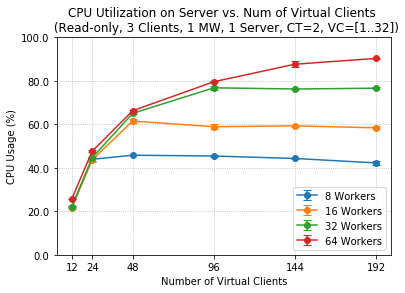

In [33]:
f = plt.figure()
plt.title("CPU Utilization on Server vs. Num of Virtual Clients \n (Read-only, 3 Clients, 1 MW, 1 Server, CT=2, VC=[1..32])")

for worker in worker_list:
    # extract values of interest
    df_c_cut = df_c[(df_c.worker == worker)]
    
    vcs = df_c_cut['client']
    tps = df_c_cut['cpu_mean']
    std = df_c_cut['cpu_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("CPU Usage (%)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=100)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/two_mws/"+date+"/"+file_name[:-4]+".png", dpi = 150)

## Network send activity plot

In [29]:
# read data into pandas dataframe
file_name = 'dstat_server_netsend_ratio_0:1.csv'
df_c = pd.read_csv(base_path + file_name)
df_c

,client,worker,netsend_mean,netsend_std
0,12,8,1.253909e+07,8122.239396
1,12,16,1.254556e+07,11413.918021
2,12,32,1.253155e+07,4634.483590
3,12,64,1.254935e+07,19531.181547
4,24,8,1.251902e+07,10288.023285
5,24,16,1.256310e+07,10520.342169
6,24,32,1.254180e+07,21834.484021
7,24,64,1.255913e+07,10291.772100
8,48,8,1.253979e+07,6073.182885
9,48,16,1.255681e+07,10625.227454


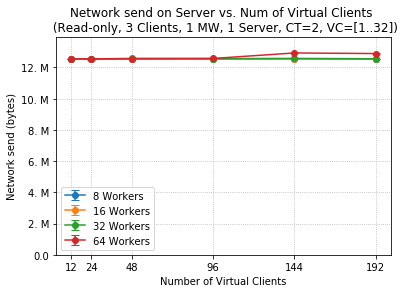

In [30]:
f = plt.figure()
plt.title("Network send on Server vs. Num of Virtual Clients \n (Read-only, 3 Clients, 1 MW, 1 Server, CT=2, VC=[1..32])")

for worker in worker_list:
    # extract values of interest
    df_c_cut = df_c[(df_c.worker == worker)]
    
    vcs = df_c_cut['client']
    tps = df_c_cut['netsend_mean']
    std = df_c_cut['netsend_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Network send (bytes)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=1e6+np.max(df_c['netsend_mean']))
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/two_mws/"+date+"/"+file_name[:-4]+".png", dpi = 150)

## Network recv activity plot

In [23]:
# read data into pandas dataframe
file_name = 'dstat_mw_netrecv_ratio_0:1.csv'
df_c = pd.read_csv(base_path + file_name)
df_c

,client,worker,netrecv_mean,netrecv_std
0,12,8,6.820542e+06,34692.989901
1,12,16,6.863753e+06,43215.499845
2,12,32,6.897403e+06,32511.733966
3,12,64,6.867558e+06,41132.999914
4,24,8,6.612025e+06,39392.559647
5,24,16,6.638788e+06,14570.139378
6,24,32,6.581862e+06,69446.793969
7,24,64,6.623082e+06,33119.489090
8,48,8,6.677558e+06,29947.952587
9,48,16,6.610460e+06,27059.340336


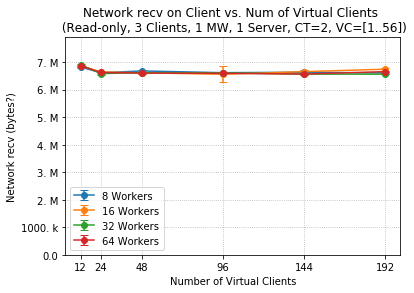

In [24]:
f = plt.figure()
plt.title("Network recv on Client vs. Num of Virtual Clients \n (Read-only, 3 Clients, 1 MW, 1 Server, CT=2, VC=[1..56])")

for worker in worker_list:
    # extract values of interest
    df_c_cut = df_c[(df_c.worker == worker)]
    
    vcs = df_c_cut['client']
    tps = df_c_cut['netrecv_mean']
    std = df_c_cut['netrecv_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Network recv (bytes?)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=1e6+np.max(df_c['netrecv_mean']))
plt.legend()


ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/two_mws/"+date+"/"+file_name[:-4]+".png", dpi = 150)